In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install mrcfile
import mrcfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.0 MB/s eta 0:00:00


In [12]:
mrc = mrcfile.read("/content/drive/MyDrive/sp-coarse-refinement-gIv9o2RaqVVidwXc_r01_03.mrc")
mrc.shape

mrc_pre = mrcfile.read("/content/drive/MyDrive/sp-coarse-refinement-gIgSArrxDG8QIyCv_r01_05.mrc")
mrc_pre.shape

(256, 256, 256)

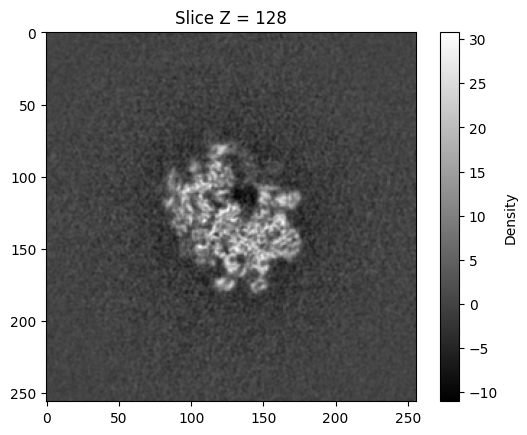

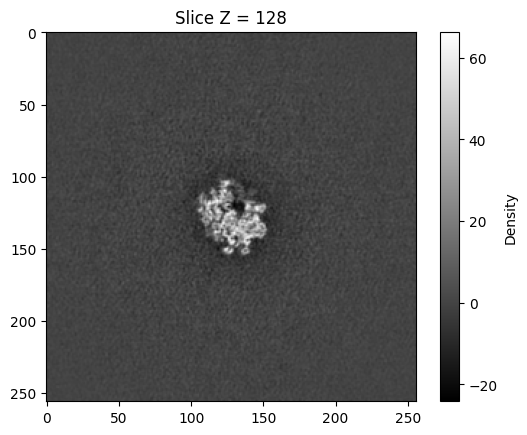

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# pick the middle slice along Z
z_mid = mrc.shape[0] // 2
slice_xy = mrc[z_mid, :, :]

plt.imshow(slice_xy, cmap='gray')
plt.colorbar(label='Density')
plt.title(f"Slice Z = {z_mid}")
plt.show()


##--- the pre-refinement or only 1 stage refinement---##
z_mid = mrc_pre.shape[0] // 2
slice_xy = mrc_pre[z_mid, :, :]

plt.imshow(slice_xy, cmap='gray')
plt.colorbar(label='Density')
plt.title(f"Slice Z = {z_mid}")
plt.show()


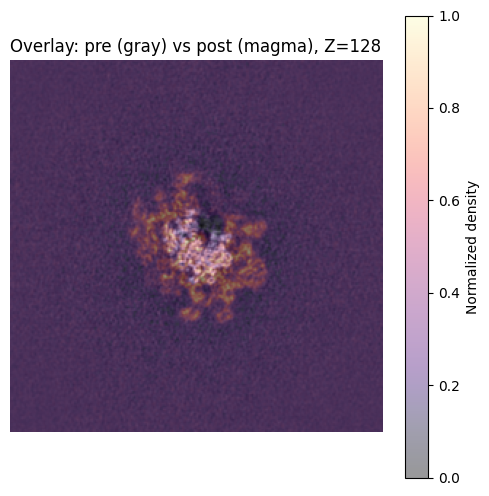

Pearson correlation between pre and post slices: 0.20310403103794253


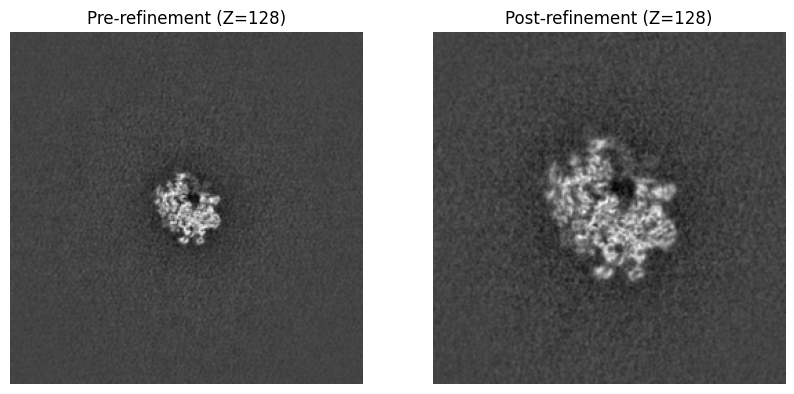

In [17]:
# post-refinement volume
z_mid_post = mrc.shape[0] // 2
slice_post = mrc[z_mid_post, :, :]

# pre-refinement volume
z_mid_pre = mrc_pre.shape[0] // 2
slice_pre = mrc_pre[z_mid_pre, :, :]

import matplotlib.pyplot as plt
import numpy as np

# (optional) normalize both to [0,1] for nicer visualization
def norm(x):
    x = x.astype(np.float32)
    x = x - x.min()
    if x.max() > 0:
        x = x / x.max()
    return x

slice_post_n = norm(slice_post)
slice_pre_n  = norm(slice_pre)

plt.figure(figsize=(6, 6))

# base: pre-refinement in grayscale
plt.imshow(slice_pre_n, cmap='gray')

# overlay: post-refinement in a different colormap with transparency
plt.imshow(slice_post_n, cmap='magma', alpha=0.4)

plt.title(f"Overlay: pre (gray) vs post (magma), Z={z_mid_post}")
plt.colorbar(label='Normalized density')
plt.axis('off')
plt.show()

post_flat = slice_post.ravel()
pre_flat  = slice_pre.ravel()

corr = np.corrcoef(post_flat, pre_flat)[0, 1]
print("Pearson correlation between pre and post slices:", corr)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(slice_pre, cmap='gray')
axes[0].set_title(f"Pre-refinement (Z={z_mid_pre})")
axes[0].axis('off')

axes[1].imshow(slice_post, cmap='gray')
axes[1].set_title(f"Post-refinement (Z={z_mid_post})")
axes[1].axis('off')

plt.show()
